## Jonathan Alexis Urrutia Anguiano 414011025
### Física computacional
### Ricardo Méndez
# Tarea Examen 1 

# Ejercicio 1

In [1]:
from pylab import *
from numpy import *
from scipy.integrate import *
from matplotlib import animation
%matplotlib inline

Supongamos uns sitema con un partícula moviéndose sobre una circunferencia de radio $R$. Entonces la velocidad es $\dot{\vec{r}} = r {\dot\theta}\hat{e}_\theta$ y el momento angular es
$$
\vec{L} = r\hat{e}_r \times m\dot{\vec{r}} = \hat{e}_z R^2m\dot{\theta},\\
\Rightarrow \dot{\theta} = \frac{L}{mR^2},
$$
Por este resultado la energía del sistema es
$$E=  \frac{p^2}{2m} = \frac{m^2r^2 {\dot\theta}^2}{2m} = \frac{L^2}{2mR^2},$$
El sistema se perturba cada tiempo $\tau$ con un afuerza en la misma dirección, sentido y magnitud $\epsilon$. Esta fuerza cambia el momento lineal y el angular de forma instantenea.Como el radio es constante, la magnitus del momento angular y la del lineal son proporcionales, por este motivo se trabajará con el momento lineal en todo momento.

En el momento en el que la fuerza anterior actúa sobre la masa, el cambio en la cantidad de movimiento es $\Delta p = \epsilon \cos\theta$.

Como $\Delta p = p_{i+1}- p_{i} \Rightarrow p_{i+1} = p_i + \Delta p$. Por lo que
$$ p_{i+1} = p_i + \epsilon \cos\theta$$.
Ya que $\theta = \theta_0 + \dot\theta t$ sabemos que $\Delta \theta = \dot\theta \Delta t$, pero $\Delta t = \tau$. Por otro lado, $\Delta \theta = \theta_i - \theta_{i+1}$, entonces

\begin{align}
\theta_{i+1} &= \theta_i + \Delta \theta\\
            &= \theta_i + \dot{\theta} \Delta t\\
            &=  \theta_i + \dot{\theta}\tau\\
            &= \theta_i + \frac{L_{i+1}}{mR^2}\tau\\
\end{align}

b) Con $\epsilon =0$ usar 200 condiciones iniciales tales que $p_0$ pertenezca a $[-\pi/2,\pi/2]$ y $\theta$ a $[0,2\pi]$. y encontrar las curvas en el plano ($\theta,p)$ que resultan de muchas iteraciones. Explicar

Hacemos un programa para que cree las condiciones iniciales aleatorias entre los intervalos pedidos.

In [2]:
def cond_ini():
    theta_0 = 2*pi*rand()
    p_0 = (.5-rand())*pi
    return array([theta_0,p_0])

Hacemos un programa para el mapeo:

In [3]:
def mapeo_per(theta_p, tau, epsilon):  #Mapeo cuando se perturba el sistema
    theta_0, p_0 = theta_p[0], theta_p[1]
    
    p_1 = p_0 + epsilon*cos(theta_0)
    theta_1 = theta_0 + p_1 * tau
    return array([theta_1,p_1])

def graficas(AX, t,tau,epsilon):
    for i in xrange(200):
        sol = zeros([len(t),2])
        sol[0] = cond_ini()
    
        for j in xrange(len(t)-1):
            sol[j+1] = mapeo_per(sol[j],tau, epsilon)
            sol[j+1][0] = sol[j+1][0] % (2*pi)
        AX.set_title(r"$\theta$ vs. $p$ con $\epsilon = %s$" %(str(epsilon)),fontsize = 30)
        AX.set_xlabel(r'$\theta$',fontsize = 20), AX.set_ylabel(r'$p$',fontsize = 20), AX.grid(True)
        AX.set_xlim(0,2*pi),AX.set_ylim(-pi/2,pi/2)
        AX.plot(sol[:,0],sol[:,1],'.',markersize = 1)

Las ecuaciones de movimiento son muy sencillas, ya que la evolución en el tiempo de $\theta$ y p corresponden respectivamente a una evolución a omega constante y p constante, cuando la perturbación no está prendida, y a una evolución descrita por las expresiones de a) cuando prendemos la perturbación.

Resolvemos ahora la evolución del sistema para 200 condiciones iniciales aleatorias.

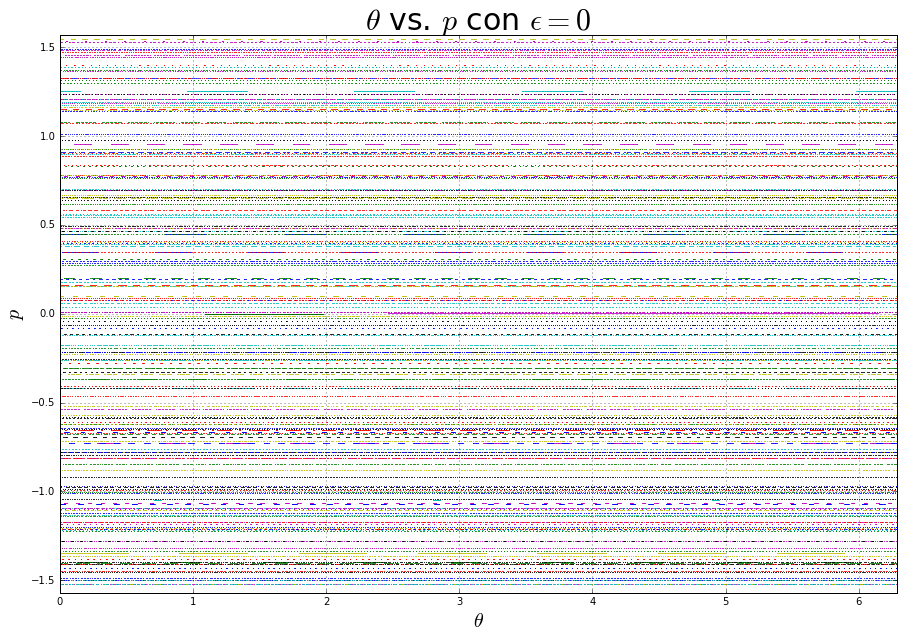

In [4]:
fig = figure(figsize=(15,10))
ax = fig.add_subplot(111)
tau = 2
epsilon =0
t = arange(0,50,.1)

graficas(ax,t,tau,epsilon)

show()

Para que los puntos sean fijos, es necesario que $\theta_{i+1} = \theta_i$ y que $p_{i+1} = p_i$. De las ecuaciones anteriores, para que esto sea cierto, es necesario que se cumplea $\cos\theta = 0$, suponiendo que $\epsilon$ no es nulo. Entonces, los puntos estacionarios estáne en
$$\theta = \frac{\pi}{2}, \frac{3 \pi}{2}$$

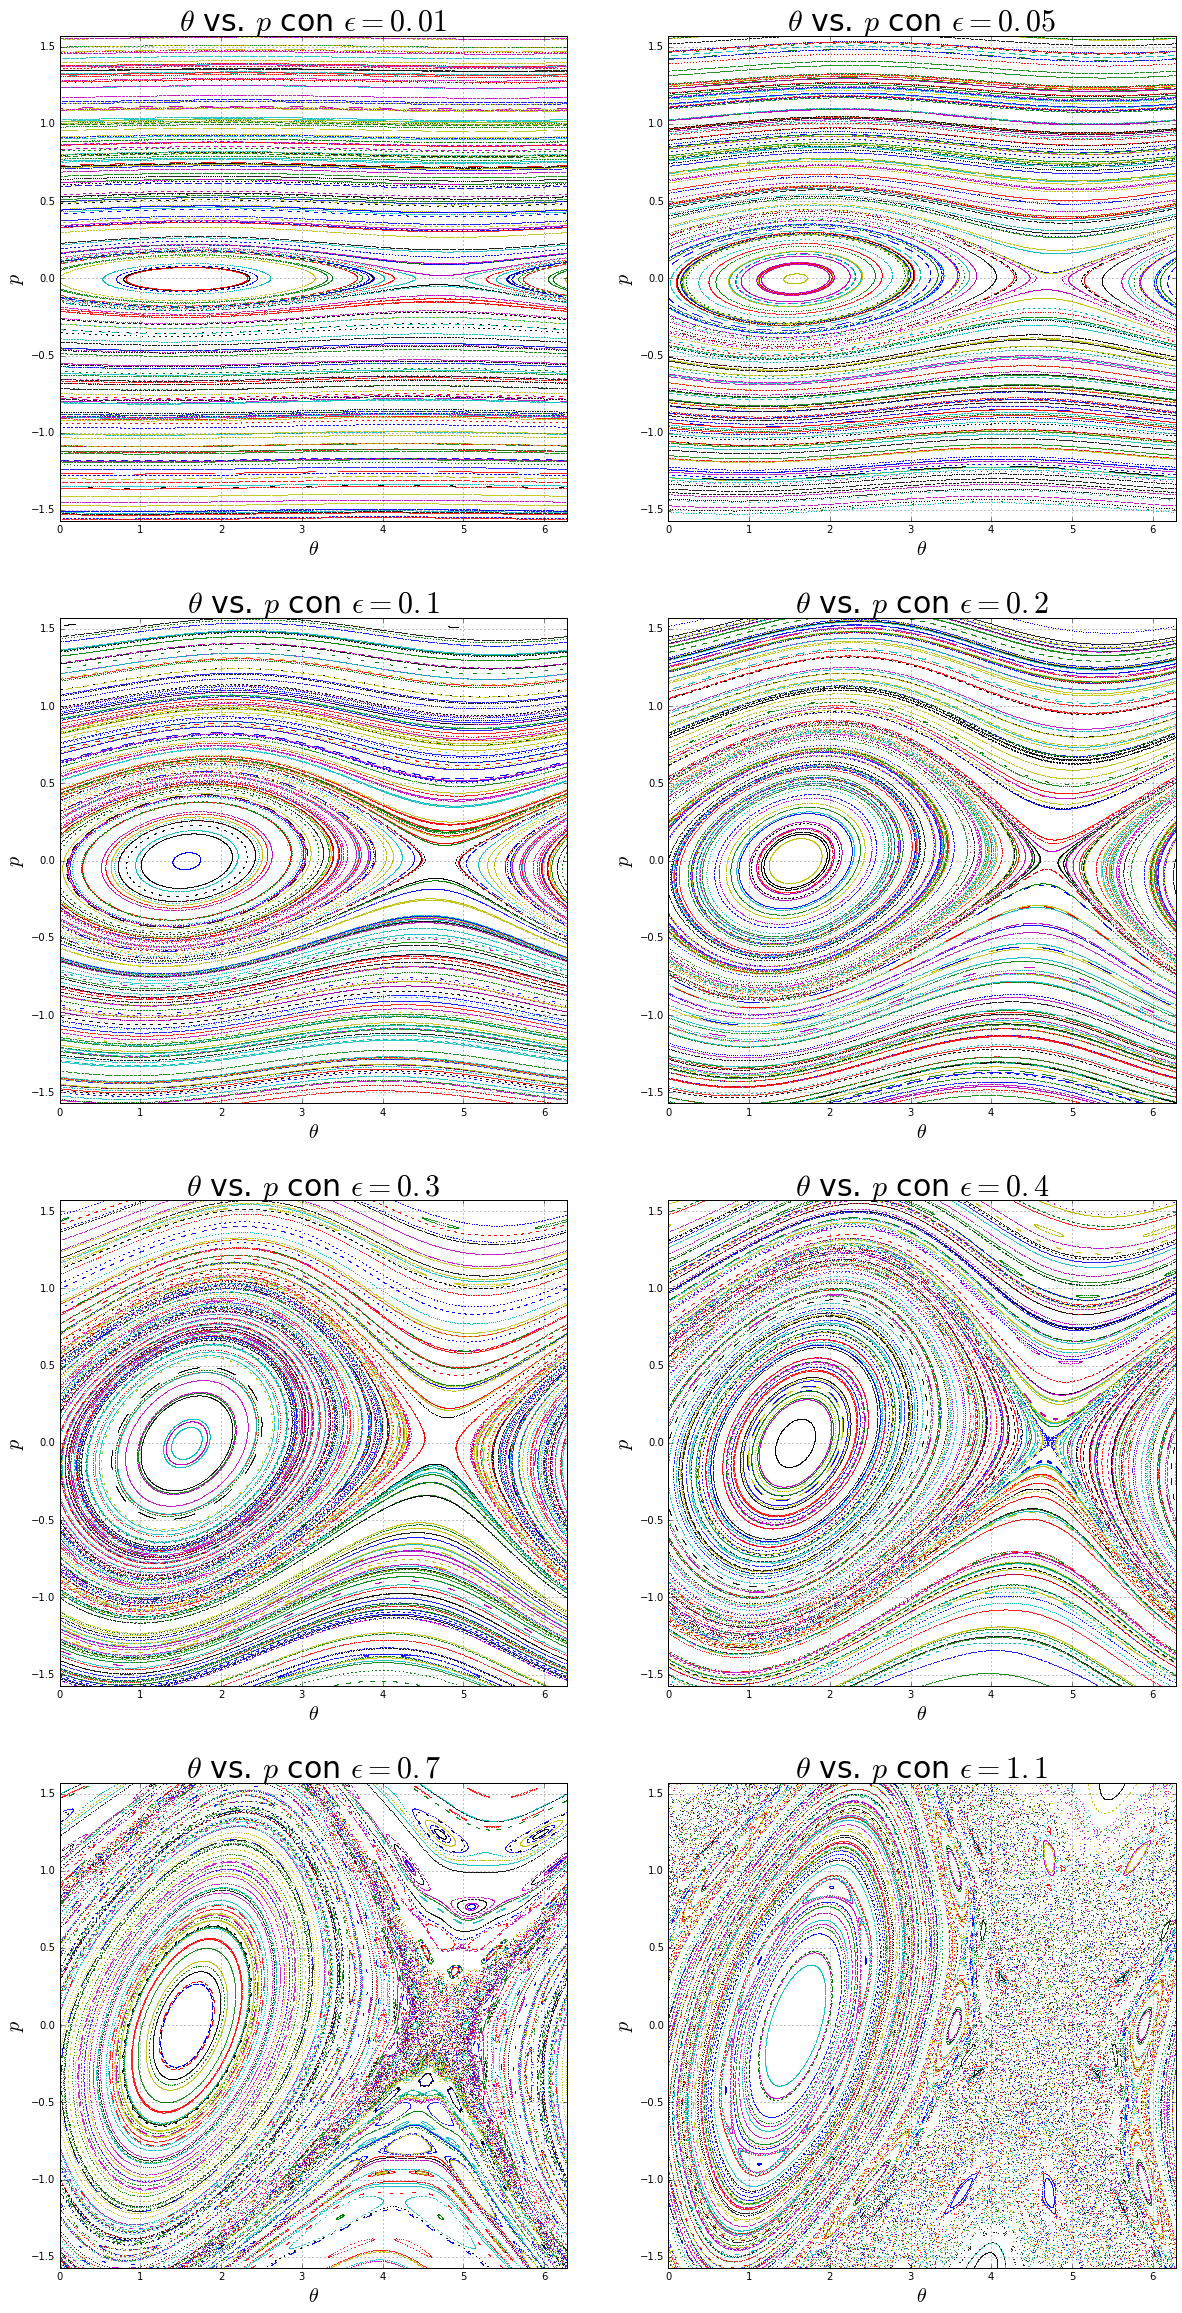

In [5]:
epsilon = array([0.01,0.05,0.1,0.2,0.3,0.4,0.7, 1.1])
tau = 1
t = arange(0,50,.1)

fig, ax = plt.subplots(4,2,figsize=(20, 40))
for i in xrange(4):
    for j in xrange(2):
        graficas(ax[i,j],t,tau,epsilon[j+2*i])
show()

# Ejercicio 2
Sea el Hamiltoniano $H$
$$ H = \frac12 (p^2_x + p^2_y) + \frac12 (x^2+y^2) + x^2 y - \frac13 y^3, $$

y como no hay dependencia del tiempo y $V = V(\vec r)$, $H=E$ y es una coonstante de movimiento. Como $E=H =T-V$, indentificamos al potencial como
$$ V = \frac12 (x^2+y^2) + x^2 y - \frac13 y^3, $$
si desprecian los términos en $x,y$ de tercer orden o más se obtiene 
$$ V \approx \frac12 (x^2+y^2), $$
que es un movimiento de oscilador armónico.
Ahora calculando las derivadas del hamiltoniano respecto a los momentos y a las posiciones es posible obtener la ec. de movimiento a resolver, que es

$$
\left(\begin{array}{c}\dot u_1 \\ \dot v_1 \\ \dot u_2\\ \dot v_2\end{array}\right) = \left(\begin{array}{c} u_2 \\ v_2 \\-u_1(2v_1+1)\\ v^2_1 - v_1 - u^2_1\end{array}\right)
$$

con $x = u_1,\, u_2 = \dot x,\, v_1 =y$ y $v_2 = \dot y$

In [6]:
def ec_mov(x,t):  #x = [x,y,px,py]
    u1, v1, u2, v2 = x[0], x[1], x[2], x[3]
    return array([u2,v2, -u1*(2*v1+1), v1**2 -v1 - u1**2])

Y vamos a obtnener condiciones iniciales para que la Energía sea igual a un valor dado. Estas condiciones están pensadas para todas las preguntas del ejercicio. Nótese que si $x=0$, y definiendo $E_0 $ como la partel hamiltoniano que no depende de $p_x$, se puede calcular
$$ p_x = \sqrt{2(E-E_0)}$$

In [8]:
def condiciones(E):
    y =  0.1*rand()
    py = 0.15*(rand()-0.5)
    px_vir = 2*(E+(1./3.)*y**3-0.5*y**2)-py**2    
    while px_vir < .0:
        y, py = 0.1*rand(), 0.15*(rand()-0.5)
        px_vir = 2*(E+(1./3.)*y**3-0.5*y**2)-py**2
    px = sqrt(px_vir)
    return array([0.0, y, px, py])

 Además encontremos los puntos en los que $x=0$ pues nos será útil más adelante

In [9]:
def root_trayect(func, ptoi, ti, error=1e-5):
    while abs(ptoi[0]) > error:
        tip1 = ti - (ptoi[0]/ptoi[2])
        paso = odeint(func, ptoi, [ti, tip1], atol = 1e-9, rtol= 1e-9)
        ptoi = paso[-1]
    return ptoi

Observemos como se ve el comportamiernto dada una energía menor a un sexto.

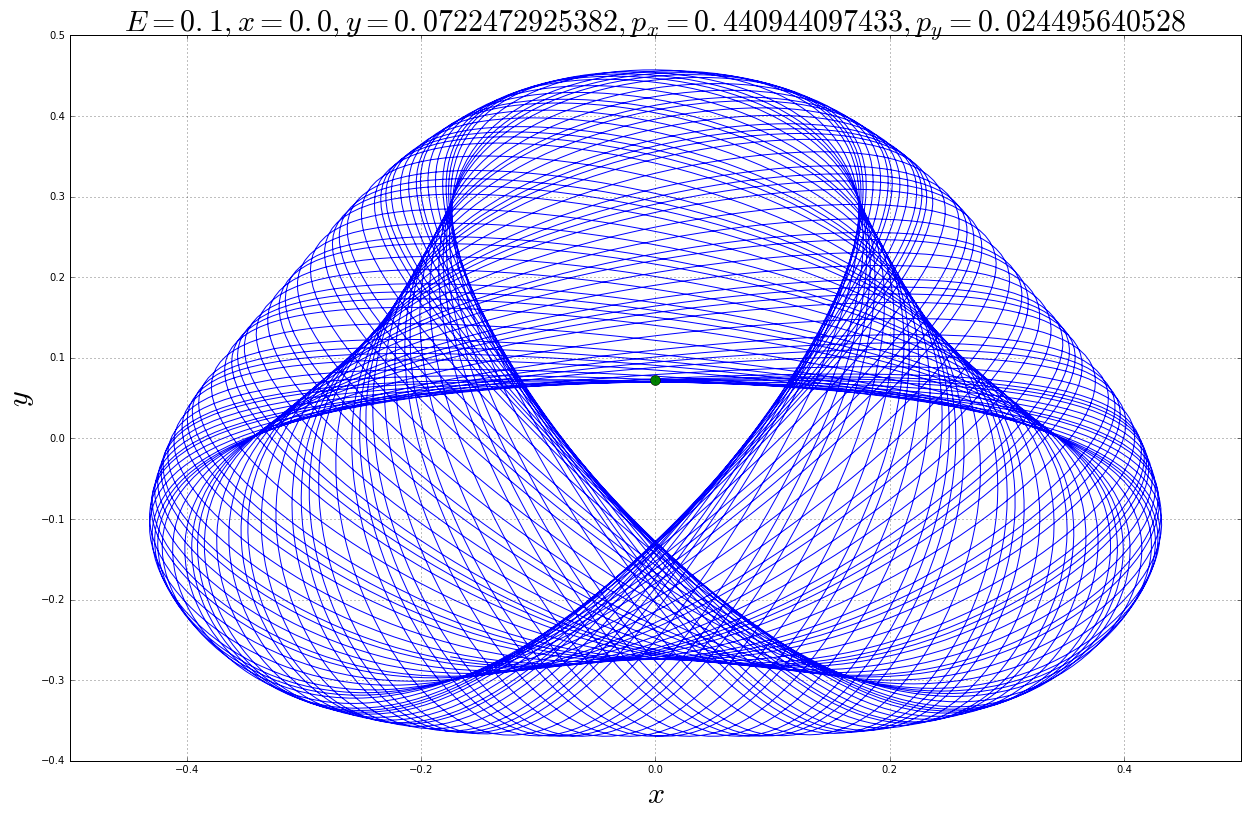

In [10]:
E = .1
t = linspace(0,500,10000)
ci = condiciones(E)

fig, ax = plt.subplots(figsize=(21, 13))
title(r'$E=%s, x=%s, y=%s, p_x=%s, p_y=%s$'%(str(E),str(ci[0]),str(ci[1]),str(ci[2]),str(ci[3])),fontsize = 30)
xlabel(r'$x$',fontsize=30),ylabel(r'$y$',fontsize = 30), grid(True)

sol = odeint(ec_mov, ci, t, mxstep=2000, atol=1e-9, rtol=1e-9)
plot(sol[:,0], sol[:,1])
plot(ci[0], ci[1], 'o', markersize = 10)
show()

Ahoa veremos cómo se ve el mapeo de Poincare, es decir, los puntos donde x es igual a cero

In [13]:
def mapeo_poincare(func, E, t): 
    p_ini = condiciones(E)
    
    sol = odeint(func, p_ini, t, mxstep=2000, atol=1e-9, rtol=1e-9)
    num = len(t)
    raices, puntos = zeros(num), zeros((num,4))
    j = 0
    for i in range(num-1):
        if sol[i][0]*sol[i+1][0] < 0.0:
            puntos[j] = root_trayect(func, sol[i], t[i], error=1e-5)
            j += 1
    puntos = puntos[0:j]
    return array([puntos,p_ini])

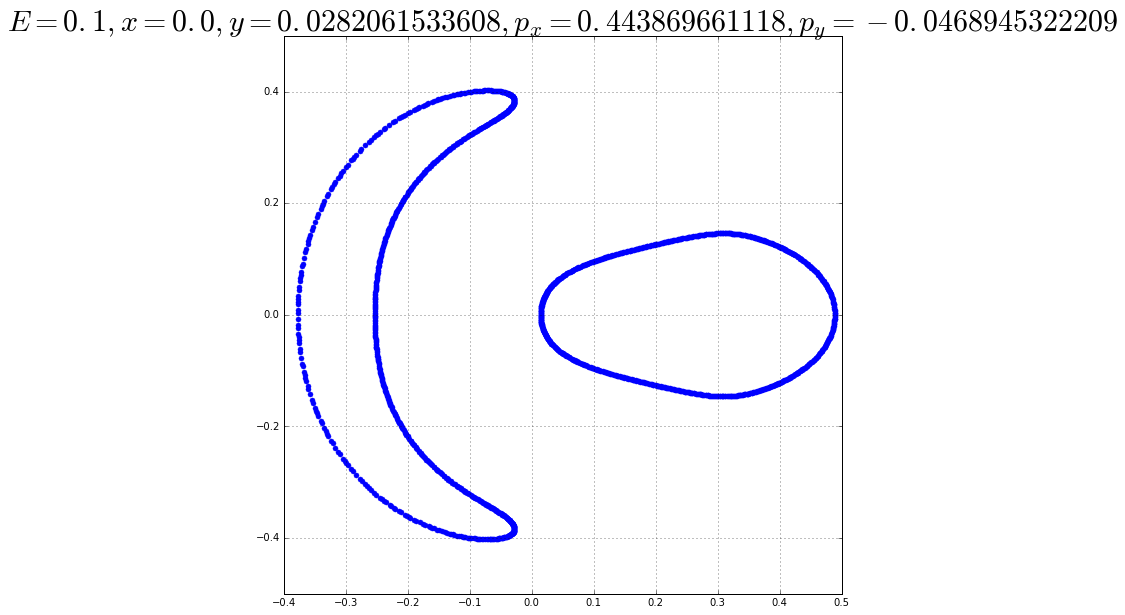

In [25]:
E = .1
t = linspace(0,5000,10000)

fig, ax = plt.subplots(figsize=(10, 10))

puntos, ci = mapeo_poincare(ec_mov, E, t)
plot(puntos[:,1], puntos[:,3],'.',markersize=10)

title(r'$E=%s, x=%s, y=%s, p_x=%s, p_y=%s$'%(str(E),str(ci[0]),str(ci[1]),str(ci[2]),str(ci[3])),fontsize = 30),grid(True)
show()

Finalmente, hagamos esto mismo pero con valores de energías distintos.

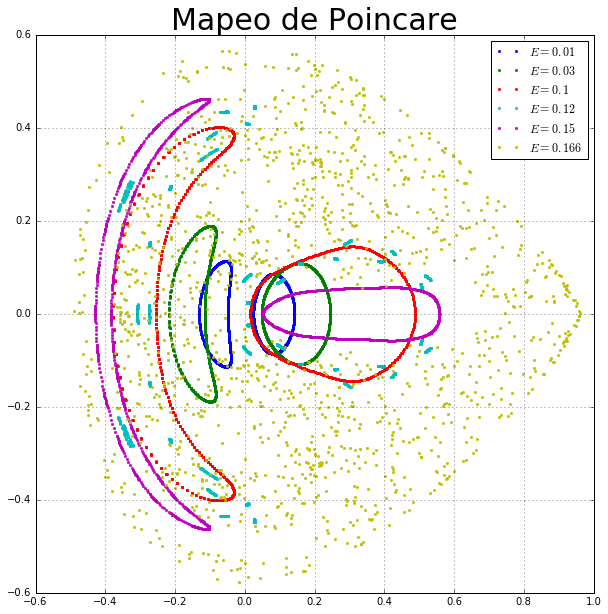

In [27]:
t = linspace(0, 5000, 15000)
E = array([0.01, 0.03, 0.1, 0.12, 0.15, 0.166])

fig, ax = plt.subplots(figsize=(10, 10))
title(r'Mapeo de Poincare',fontsize = 30), grid(True)
for e in E:
    puntos, ci = mapeo_poincare(ec_mov, e, t)
    plot(puntos[:,1], puntos[:,3],'.', markersize=5, label="$E=%s$"%(str(e)))

ax.legend(loc='upper right')
show()